## Introducing earthkit

**earthkit** is an **open-source** Python project led by ECMWF, providing powerful tools for speeding up weather and climate science workflows by simplifying **data access**, **processing**, **analysis**, **visualisation** and more.

**earthkit** lowers the barrier to entry for interacting with climate data in Python by providing high-level, easy-to-use functions for performing common data analysis and visualisation tasks. Designed to be **format-agnostic**, **earthkit** allows you to focus on working with whatever data you have without worrying about technical issues like data formats.

**earthkit** is currently in the *alpha* stage of development, but is already available in GitHub, PyPI and conda as an open-source project than can be installed, played with and contributed to. **earthkit** will become the recommended library for retrieving, analysing and visualising CDS, ADS and EWDS data when it releases in 2024, replacing the legacy *CDS Toolbox*.

These notebooks provide an introduction to using earthkit as a one-stop-shop for speeding up your workflows for interacting with CDS data.

To get started, import the `earthkit` module.

In [1]:
import earthkit as ek
import earthkit.maps
import os

### Retrieving data from the EWDS

The core function we will be using for retrieving and opening data is `ek.data.from_source`. You can use this function to open data from many different sources, such as URLs, local files, and of course the EWDS.

To access data from the EWDS source, we need to pass `"ewds"` as the first argument to `ek.data.from_source`. The other arguments are exactly the same arguments expected by the CDS API - that is, the name of the dataset followed by the request payload. If you're familiar with the **CDS API**, you'll already be acquainted with the syntax for these requests.

In the following example, we will retrieve data from the EWDS dataset [Fire danger indices historical data from the Copernicus Emergency Management Service](https://ewds.climate.copernicus.eu/datasets/cems-fire-historical-v1). We will access Fire weather index for 20240731

**EWDS is not usable from Earthkit so for now we will use the CDS API but we have the earthkit method here for when we can switch.**

In [8]:

# If you are using the pre-downloaded data then please set DOWNLOAD_FROM_CDS to False
# and set the LOCAL_DATA_DIR to where you stored the data.

# This is the new method of downloading but it does not yet support the EWDS, keeping it here for when its ready...
DOWNLOAD_FROM_CDS = False
LOCAL_DATA_DIR = "data/"
TARGET=f"{LOCAL_DATA_DIR}/fwinx_reanalysis.grib"
os.makedirs(LOCAL_DATA_DIR,exist_ok=True)

fwi_data = ek.data.from_source(
    "cds",
    "cems-fire-historical-v1",
    variable= ["fire_weather_index"],
    dataset_type= "consolidated_dataset",
    system_version= ["4_1"],
    year= ["2024"],
    month= ["07"],
    day= ["31"],
    grid= "0.25/0.25"
)

2024-10-29 12:54:47,636 WARNING [2024-10-28T00:00:00] System is having technical problems. We are working to resume operations asap. You can check status [here](https://status.ecmwf.int/).
2024-10-29 12:54:47,637 INFO [2024-09-26T00:00:00] Welcome to the New [CEMS](https://emergency.copernicus.eu/) [Early Warning Data Store (EWDS)](https://ewds-beta.climate.copernicus.eu/)! This new system is in its early days of full operations and still undergoing enhancements and fine tuning. Some disruptions are to be expected. Your [feedback](https://jira.ecmwf.int/plugins/servlet/desk/portal/1/create/202) is key to improve the user experience on the new EWDS for the benefit of everyone. Thank you.
2024-10-29 12:54:47,637 INFO [2024-09-26T00:00:00] Watch our [Forum]( https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2024-10-29 12:54:56,658 WARNING [2023-12-12T13:00:00] This is a CEMS dataset!
2024-10-29 12:54:56,659 INFO Request ID is e7b419ea-46e7-446c-b653-4060b5e2988

c9eb84e072ac376a1fef8c5f64178ba9.grib:   0%|          | 0.00/675k [00:00<?, ?B/s]

One advantage of **earthkit** over the legacy CDS API is that local downloads and caching are automatically handled for you. That means that you don't need to save your request to a specific file and then read that file into Python - it's all handled in one step. By default, files will be removed from your local cache after a few days - so you don't even need to worry about cleaning up files you no longer need, as they will be automatically housekept!

Note that we didn't include a `format` key in our request payload, even though cems-fire-historical can be retrieved in either GRIB or netCDF format. **earthkit** is designed to be **format agnostic** - that is, earthkit tools should work in exactly the same way whether you have GRIB data *or* netCDF data, so we can comfortably exclude the data format from our request and accept the default selection made by the CDS.

The `data` object that has been returned from our CDS request is a special kind of **earthkit** object, providing a range of convenient methods for interrogating a data source or converting it to a format that's familiar to you, such as xarray, numpy or pandas - or saving to a local file.

In [12]:
# Convert to an xarray Dataset object
print("FWI DATA in Xarray")
print(fwi_data.to_xarray())
# Convert to an numpy
print("FWI DATA in Numpy")
print(fwi_data.to_numpy())
# Convert to a pandas dataframe
print("FWI DATA in Pandas")
print(fwi_data.to_pandas().head())

FWI DATA in Xarray
<xarray.Dataset> Size: 8MB
Dimensions:    (latitude: 721, longitude: 1440)
Coordinates:
  * latitude   (latitude) float64 6kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude  (longitude) float64 12kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
Data variables:
    fwinx      (latitude, longitude) float64 8MB ...
Attributes:
    param:        fwinx
    class:        gw
    stream:       oper
    levtype:      sfc
    type:         fc
    expver:       0001
    date:         20240731
    time:         0
    origin:       ecmf_ea
    domain:       g
    Conventions:  CF-1.8
    institution:  ECMWF
FWI DATA in Numpy
[[[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]]
FWI DATA in Pandas
    lat   lon  value datetime domain expver class type stream model   origin  \
0  90.0  0.00    NaN     None      g   0001    gw   fc   oper 

### Quick visualisation with **earthkit-maps**

So far we have have been making use of **earthkit-data** (`ek.data`) - one of many sub-components of **earthkit** - designed for accessing and reading data from a variety of sources.

Now we can make use of **earthkit**'s geospatial visualisation component: **earthkit-maps** (`ek.maps`). **earthkit-maps** offers convenient methods for very quickly producing high-quality graphics from geospatial data, while also providing the flexibility to tailor visualisations to specific needs.

The fastest way to get started with **earthkit-maps** is to use the `ek.maps.quickplot` function to provide a quick look at the data we just downloaded from the CDS. With `quickplot`, the colour scale, data units, title and map projection will be automatically detected from the metadata of the data we are plotting, so we don't need to provide anything more than the data we would like to visualise:

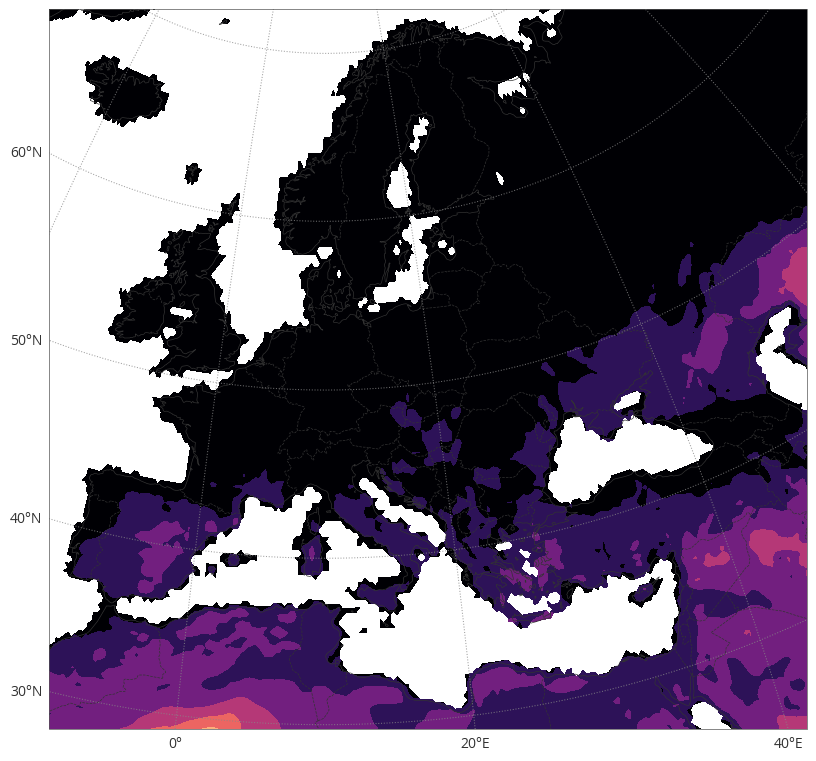

In [6]:
chart = ek.maps.Chart(domain="europe")
chart.plot(fwi_data)   

chart.coastlines()
chart.borders()
chart.gridlines()

This is a great way to take a quick look at the data, but what if we want to tailor the visualisation to more specific needs?

Let's say we would like to visualise the same data:
- over a European domain
- with units of *degrees celsius* instead of *Kelvin*
- with a more informative title

**earthkit-maps** provides plenty of freedom to customise our plot, with a simple API filled with convenient templates. Instead of using the `ek.maps.quickplot` method, we need to create an `ek.maps.Superplot` object, which is the canvas onto which we will plot our data. The other steps in our visualisation are explained in in-line comments in the code cell below:

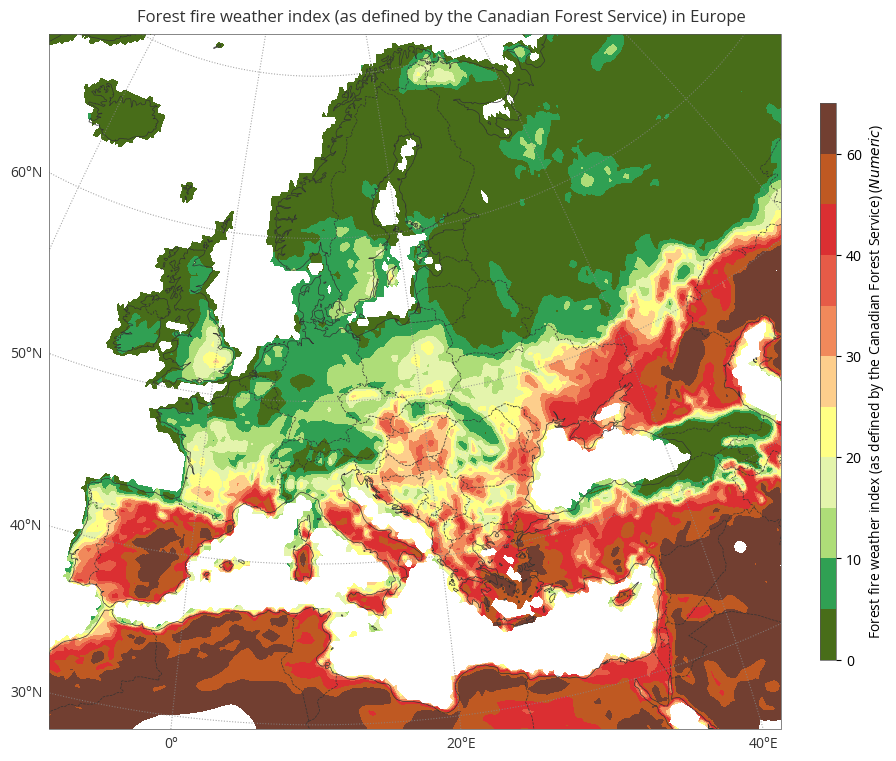

In [7]:
# Instantiate a Superplot object with the domain set to "Europe"
# earthkit-maps allows named domains based on many presets, including
# continents, countries and more - so feel free to experiment with domains!

chart = ek.maps.Chart(domain="Europe")

gust_style = earthkit.maps.Style(
    colors=["#486d19","#30a053","#aedd78","#e4f4ac","#ffff84","#fdce8c","#f1895b","#e65b47","#db2f32","#bf5922","#723f31"],
    levels=[0, 5, 10, 15, 20, 25, 30, 35, 40, 50, 60, 100]  ,
)
# chart.plot will attempt to find a suitable style for the data based
# on its metadata - usually the name of the variable we're plotting.
# We can also specifically tailor the style to use some units of choice,
# in this case celsius - but this depends on a corresponding pre-configured
#style existing within earthkit-maps.
# In the next notebook we will explore how to create custom styles.
chart.plot(fwi_data, units="celsius", style=gust_style)

# The API for adding auxilliary layers is very straightforward
chart.coastlines()
chart.borders()
chart.gridlines()

# Titles can include template keys between curely brackets, which are
# extracted from the data's metadata. This makes it much easier to transfer
# code between projects, without having to completely re-write titles
chart.title("{variable_name} in {domain}")
chart.legend(location="right")

chart.show()

Now try experimenting with the cell above by changing the domain and units. Notice that the title and legend automatically update to reflect your choices!

### Conclusion

In this notebook we have learnt how to retrieve data from the CDS and produce simple visualisations with **earthkit**. In the next example, we will learn how to further customise **earthkit-maps** visualisations on a few different kinds of datasets.